In [18]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [3]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here
fruits = 100
apples = 60
oranges = 40
# I'm using 
p = apples/fruits
q = oranges/fruits

print(f"Apple chance = {p}, orange chance = {q}")

Apple chance = 0.6, orange chance = 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

2. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [4]:
# your code here
my_bernoulli = bernoulli(p)
sample20 = my_bernoulli.rvs(size=20)
sample20

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [5]:
# 1. What is the probability that the first 5 fruits are all apples?
my_bernoulli_to_binomial = binom(5, p)
chance_5apple = my_bernoulli_to_binomial.pmf(5)

print(f"There is a {chance_5apple} chance to draw 5 apples in a row.")


There is a 0.07775999999999998 chance to draw 5 apples in a row.


In [6]:
# 1b Alternative solution
chance_5appleb = p**5
print(f"There is a {chance_5appleb} chance to draw 5 apples in a row.")

There is a 0.07775999999999998 chance to draw 5 apples in a row.


In [7]:
# 2. What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?
my_bernoulli_to_binomial2 = binom(15, q)
chance_15orange = my_bernoulli_to_binomial2.pmf(15)

print(f"""There is a {chance_15orange} chance to draw 15 orange in a row.
 So there is a {chance_5apple * chance_15orange} chance to draw 5 apples and after 15 oranges""")

There is a 1.073741824000001e-06 chance to draw 15 orange in a row.
 So there is a 8.349416423424006e-08 chance to draw 5 apples and after 15 oranges


In [8]:
# 2b Alternative solution
chancep5_q15 = p**5*q**15
print(f"there is a {chancep5_q15} chance to draw 5 apples and after 15 oranges")

there is a 8.349416423424006e-08 chance to draw 5 apples and after 15 oranges


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [9]:
# your code here
my_binomial = binom(20, p)
chance_5pin20 = my_binomial.pmf(5)
print(f"There is a chance of {chance_5pin20} to draw 5 apples and 15 oranges")

There is a chance of 0.0012944935222876583 to draw 5 apples and 15 oranges


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [12]:
# your code here
chance_4orless = my_binomial.cdf(4)
print(f"There is a chance of {chance_4orless} to draw 4 apples or less")

There is a chance of 0.00031703112116863004 to draw 4 apples or less


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [16]:
# your code here
apple_drawn = np.arange(0,20)
apple_chances = my_binomial.pmf(apple_drawn)

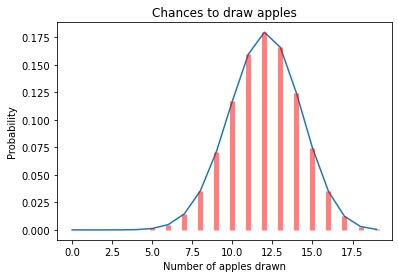

In [17]:
# Please label the axes and give a title to the plot
plt.plot(apple_drawn, apple_chances)
plt.vlines(apple_drawn, 0, apple_chances, colors = 'r', lw = 5, alpha = 0.5)
plt.title("Chances to draw apples")
plt.xlabel("Number of apples drawn")
plt.ylabel("Probability")
plt.show() 

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [20]:
# your code here 
avg_goals = 2.3
my_poisson = poisson(mu = avg_goals)

chance_to5 = (math.exp(-avg_goals) * avg_goals**5) / math.factorial(5)
print(f"The chance to match 5 goals is {chance_to5}")

The chance to match 5 goals is 0.0537750255819468


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

In [22]:
# your code here
number_goals = np.arange(0,11)
chance_goals = my_poisson.pmf(number_goals)

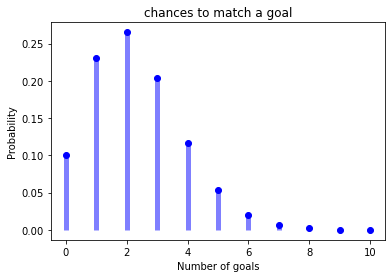

In [26]:
# Please label the axes and give a title to the plot 
plt.plot(number_goals, chance_goals, 'bo')
plt.vlines(number_goals, 0, chance_goals, colors = 'b', lw = 5, alpha = 0.5)
plt.title("chances to match a goal")
plt.xlabel("Number of goals")
plt.ylabel("Probability")
plt.show()